# STEP 0 - SETTING UP THE ENVIRONMENT

run the next few cells to import some needed modules and set up your working directory




In [ ]:
# import generic modules
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

try:
  import py3Dmol
except:
  !pip install py3Dmol
  import py3Dmol

# Now we will connect google colab to our own google drive
*Run the following cell and log in with your google account*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# go to your drive
%cd /content/drive/MyDrive

# create working directory
%mkdir cecam_school_2024
# go to directory
%cd cecam_school_2024

# check the path of the folder
%pwd

# save path to a local variable, will be useful later
path = %pwd

/content/drive/MyDrive
mkdir: cannot create directory ‘cecam_school_2024’: File exists
/content/drive/MyDrive/cecam_school_2024


 *From now on, you can treat your drive as a local directory and
save and access to data in it, here is a simple example. You can also browse your data by clicking on the folder symobl on your right and goind "manually" to your folder*.

In [ ]:
# create a random array with numpy
random_array = np.random.random((10,2))

# save the array in your folder
np.savetxt(path+"/random_array.txt",random_array)

# access to the array
print(np.loadtxt(path+"/random_array.txt"))

[[0.45431545 0.31443275]
 [0.40827695 0.17644918]
 [0.13533134 0.41818406]
 [0.52276749 0.3669995 ]
 [0.75587392 0.78566209]
 [0.87738173 0.72341927]
 [0.17976092 0.16372261]
 [0.34779954 0.08407261]
 [0.08093746 0.9139853 ]
 [0.00357434 0.87508184]]


# We download here the *simplemd* code for Molecular Dynamics

*after running this cell a folder containing the python code for running simple md will be created in your working directory*

In [ ]:
# download simplemd
!test -d simplemd || git clone --branch cecam2024 https://github.com/GiovanniBussi/simplemd.git
sys.path.append(os.getcwd() + "/simplemd/python")
import simplemd

# STEP 1 - LEARN TO RUN *simplemd*
*simplemd.SimpleMD is a class, to be initialized it requires a dictionary with the input parameters. Use Lennard-Jones units for the parameters.*


1. generate some initial positions and a simulation box using the method generate_lattice(n), it generates $4n^3$ particles and a simulation box. Print the shape of the initial positions array and the simulation box to check how they are made.

*hint 1. generate positions and simulation box with the method generate_lattice(n) of the simplemd module (remember the sintax is module.method(parameters)). It outputs the position of $4\times n \times n \times n$ particles and the coordinates of the simulation box, a good number is $\mathcal{O}(10^2)$ total particles.*


2.   create a dictionary specifying the following keys:

*   "temperature"
*   "tstep"


*   "forcecutoff" (radius within which I compute the forces)


*   "listcutoff" (radius within which I compute the lists)
*   "nstep"


*   "nconfig" (tells how often I save the positions)
*   "nstat" (tells how often I save the statistics of the simulation)



*   "cell" (simulation box)
*   "positions" (starting configuration)


*hint 2. start experimenting with a small nstep (order of 10^3), listcutoff = forcecutoff + 0.5, listcutoff < cell size*


3. Create a runner: assign to a variable the initialized class SimpleMD and run your first Molecular Dynamics simulation using runner.run()

*hint 3. the sintax is runner_variable = module.class(**dictionary_name), run with runner_variable.run(). **dictionary_name is used to pass the full dictionary to the class.*

4. after running you will be able to access the *statistics* and the *trajectory* using the attributes statistics and trajectory associated to your runner variable. Use the statistics and make a plot of the timeseries of: instantaneous temperature (add also a horizontal line with the chosen temperature), potential energy, total energy. What do you expect to see when comparing the fixed temperature and the instantaneous temperature?

*hint 4. the syntax to access the attributes is runner_variable.attribute. Remember: statistics is a (6, n_steps_saved) matrix and contains in the following order: istep, time, instantaneous temperature, potential energy, total energy, total energy + Δenergy integration.*

In [ ]:
# solution 1.
cell, positions = simplemd.generate_lattice(3)
print(positions.shape)
print(cell)

(108, 3)
(5.0388, 5.0388, 5.0388)


In [ ]:
# solution 2.
# reasonable input options
# note: initial coordinates are still missing
keys={
 'temperature': 0.722,
 'tstep': 0.005,
 'forcecutoff': 2.5,
 'listcutoff': 3.0,
 'nstep': 2000,
 'nconfig': 10,
 'nstat': 10
 }
# generate a crystal lattice and pass it:
keys["cell"] = cell
keys["positions"] = positions

In [ ]:
# solution 3.
# create runner
smd=simplemd.SimpleMD(**keys)
# run
smd.run()

100%|██████████| 2000/2000 [00:00<00:00, 7581.57it/s]


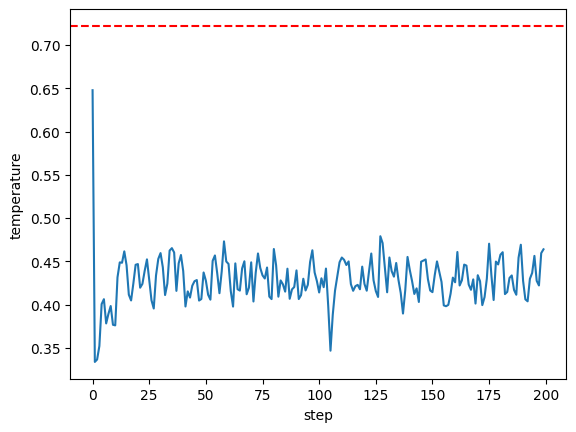

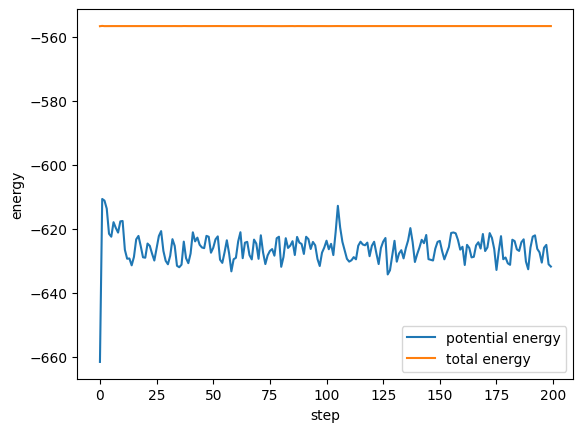

In [ ]:
# solution 4.
# plotting instantaneous temperature
fig, ax = plt.subplots()
ax.plot(np.array(smd.statistics).T[2])
ax.axhline(y=keys["temperature"], color='r', linestyle='--')
ax.set_xlabel('step')
ax.set_ylabel('temperature')
plt.show()

# plotting potential energy
fig, ax = plt.subplots()
ax.plot(np.array(smd.statistics).T[3], label="potential energy")
ax.plot(np.array(smd.statistics).T[4], label="total energy")
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('energy')
plt.show()

# STEP 2 - VISUALIZATION OF THE TRAJECTORIES

For visualizing the trajectories we will use the pyhton module "py3Dmol" that we have loaded at the beginning of this exercise, and the method "write_trajectory" of the simplemd module.

1. generate a starting configuration with 108 particles (n=3) and and a simulation box. Initialize the SimpleMD class with the initial configuration, the cell and  'temperature': 0.722,
 'tstep': 0.005,
 'forcecutoff': 2.5,
 'listcutoff': 3.0,
 'nstep': 10000,
 'nconfig': 10,
 'nstat': 10,
 'cell': your cell,
 'positions': your starting configuration.

  Create a runner and launch a simulation.

2. Generate a text file with the trajectory using the method write_trajectory of the simplemd module and save it to your working directory as a .xyz file.

*hint 1. the syntax is simplemd.write_trajectory(path+"name_to_save.xyz", runner_variable.trajectory)*

3. visualize the trajectory using py3Dmol with the following steps:


*   open the saved trajectory and process it as a text file

*hint 2. the syntax is the following:*

with open(path+"/name_saved_trajectory.xyz") as f:

traj_xyz = f.read()

*   visualize your text file trajectory using py3Dmol, here is a detailed description of its functioning https://william-dawson.github.io/using-py3dmol.html, https://pypi.org/project/py3Dmol/

*hint 3. you can use the following syntax:*



*   view = py3Dmol.view(width=400, height=300)

this creates the object that contains the visualization window (in this case a box 400x300 pixels)
*   view.addModelsAsFrames(traj_xyz, "xyz")

this adds the frames contained in the trajectory to the visualization box


*   view.setStyle({"sphere": {"radius":0.4}})

this will set the particles to be visualized as spheres
*   view.animate({'loop': "forward"})


this will create a looping video out of your trajectory




*   view.zoomTo()
*   view.show()

these last two lines will display the movie.



4.   Check the movie that you have created, do you notice something unusual?
5.   Redo the previous steps with a initial temperature = 4, how does the movie change?







In [ ]:
# solution step 3.1
keys = {
    'temperature': 1.3,
    'friction': 1.0,
    'tstep': 0.005,
    'forcecutoff': 2.5,
    'listcutoff': 3.0,
    'nstep':10000,
    'nconfig': 10,
    'nstat': 10
    }
cell, positions = simplemd.generate_lattice(3)
keys["cell"] = cell
keys["positions"] = positions
smd = simplemd.SimpleMD(**keys)
smd.run()

100%|██████████| 10000/10000 [00:03<00:00, 2826.50it/s]


In [ ]:
# solution step 3.2
simplemd.write_trajectory(path+"/trajectory.xyz", smd.trajectory)

# STEP 3 - UNDERSTANDING THE PARAMETERS

1. generate a cell and a starting configuration with 108 atoms. Re-initialize the SimpleMD class with the following parameters:

 'temperature': 0.722,
 'tstep': 0.005,
 'forcecutoff': 2.5,
 'listcutoff': 3.0,
 'nstep': 2000,
 'nconfig': 10,
 'nstat': 10
 'cell': your simulation box
 'positions': your starting configuration

now check how the energy conservation changes by running trajectories using different timesteps and find the maximum timestep allowed for this system, at each different run save the statistics to your working directory using np.savetxt(...) so you can access them in the future.

*hint 1. you can check energy conservation visually simply by plotting the total energy in multiple lines as a function of time and checking if there is a drift, you can also plot the fluctuations of the total energy and potential energy as a function of the timestep. You can use timesteps such as 0.0001, 0.001, 0.01 or larger. You may want to rescale the number of steps according to the timestep to have equally long simulations in time.*

2. Now fix the tstep to 0.001 and repeat the analysis with different values of the temperature (e.g. T=0.01, T=0.1, T=1, T=2), plot in particular the total and potential energy, what do you see?

3. Now fix the temperature = 0.722, the tstep = 0.005 and investigate the system size effect, by running the same analysis for 32, 108, 500 particles. What do you see? Does the maximum timestep allowed change, try for example for 500 particles,
(simplemd.generate_lattice(4)).



In [ ]:
# solution 1.


times = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.08]
for t in times:
  keys = {
      'temperature': 0.722,
      'tstep': t,
      'forcecutoff': 2.5,
      'listcutoff': 3.0,
      'nstep': int(40/t),
      'nconfig': 10,
      'nstat': 10
      }

  cell, positions = simplemd.generate_lattice(3)
  keys["cell"] = cell
  keys["positions"] = positions

  smd = simplemd.SimpleMD(**keys)
  smd.run()

  np.savetxt(path+"/statistics_tstep"+str(t)+".txt",smd.statistics)

100%|██████████| 500/500 [00:00<00:00, 4368.17it/s]


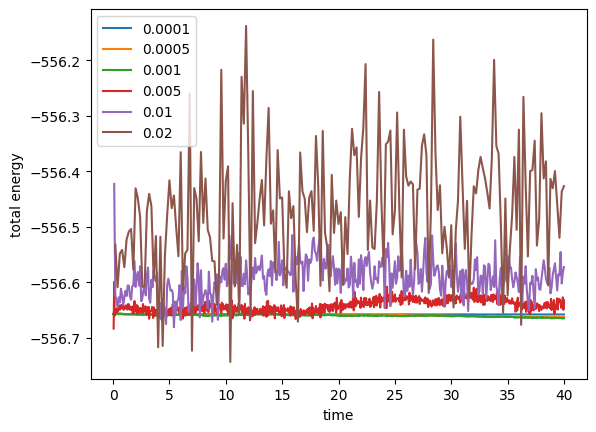

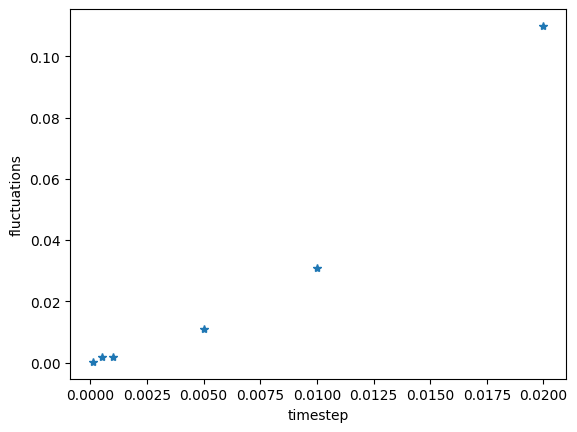

In [ ]:
# plotting solution 1.
times = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02]
fig, ax = plt.subplots()
for t in times:
  data = np.loadtxt(path+"/statistics_tstep"+str(t)+".txt")
  ax.plot(data.T[1], data.T[4], label=str(t))
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('total energy')
plt.show()

# plotting fluctuations of the energy
fig, ax = plt.subplots()
fluctuations = []
for t in times:
  data = np.loadtxt(path+"/statistics_tstep"+str(t)+".txt")
  nsteps, _ = data.shape
  fluctuations.append(np.std(data[int(nsteps/20):,4]))
ax.plot(times, fluctuations, '*')
ax.set_xlabel('timestep')
ax.set_ylabel('fluctuations')
plt.show()

In [ ]:
# solution 2.

for temp in [0.0001, 0.001, 0.01, 0.1, 1., 2., 3.]:
  keys = {
      'temperature': temp,
      'tstep': 0.001,
      'friction': 0.0,
      'forcecutoff': 2.5,
      'listcutoff': 3.0,
      'nstep': 20000,
      'nconfig': 1,
      'nstat': 1
      }
  cell, positions = simplemd.generate_lattice(3)
  keys["cell"] = cell
  keys["positions"] = positions

  smd = simplemd.SimpleMD(**keys)
  smd.run()

  np.save(path+"/statistics_temp"+str(temp)+".npy",smd.statistics)

100%|██████████| 20000/20000 [00:05<00:00, 3944.91it/s]


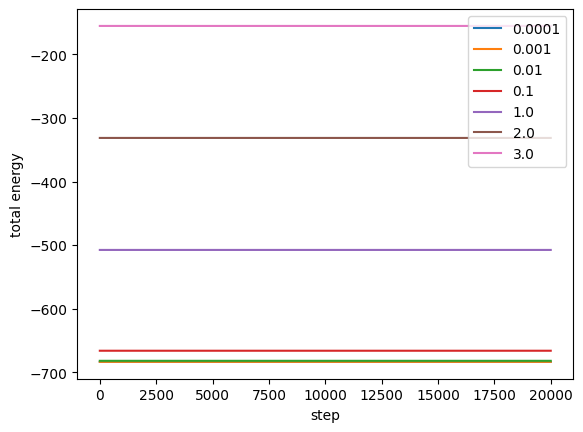

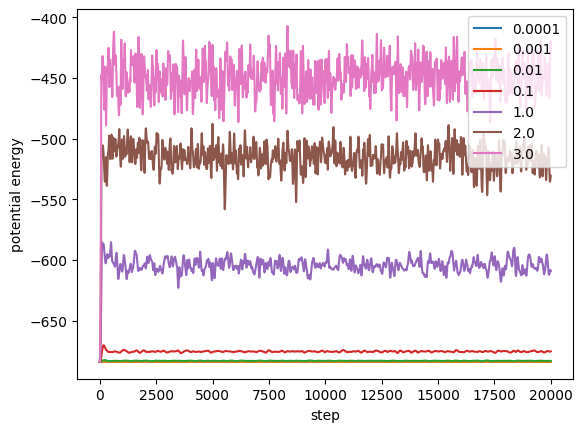

In [ ]:
# plotting results of solution 2
fig, ax = plt.subplots()
for temp in [0.0001, 0.001, 0.01, 0.1, 1., 2., 3.]:
  data = np.load(path+"/statistics_temp"+str(temp)+".npy")
  ax.plot(data.T[4,:], label=str(temp))
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('total energy')
plt.show()

fig, ax = plt.subplots()
for temp in [0.0001, 0.001, 0.01, 0.1, 1., 2., 3.]:
  data = np.load(path+"/statistics_temp"+str(temp)+".npy")
  ax.plot(data.T[3,:], label=str(temp))
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('potential energy')
plt.show()

In [ ]:
# solution 3
for n in [2, 3, 4, 5]:
  positions, cell = simplemd.generate_lattice(n)
  keys = {
      "temperature": 0.722,
      "tstep": 0.001,
      "forcecutoff": 2.5,
      "listcutoff": 3,
      "nstep": 20000,
      "nconfig": 10,
      "nstat": 10
      }
  cell, positions = simplemd.generate_lattice(n)
  keys["cell"] = cell
  keys["positions"] = positions
  smd = simplemd.SimpleMD(**keys)
  smd.run()
  np.save(path+"/statistics_n"+str(4*n**3)+".npy",smd.statistics)

100%|██████████| 20000/20000 [00:14<00:00, 1409.05it/s]


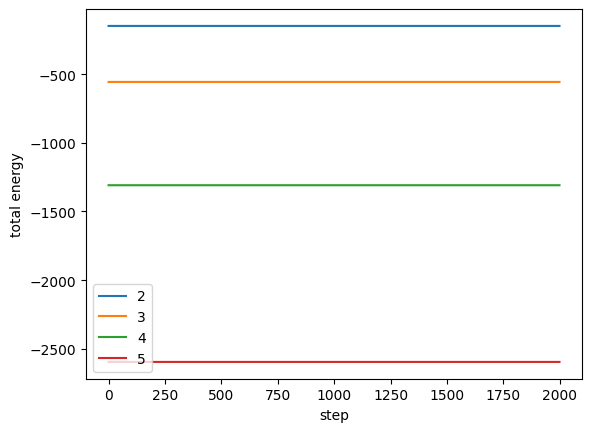

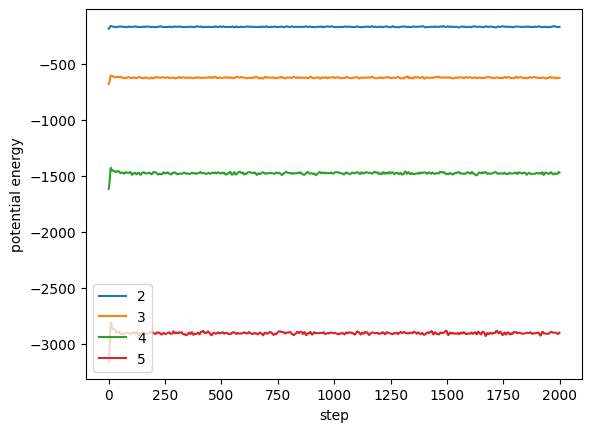

In [ ]:
# plotting results of solution 3
fig, ax = plt.subplots()
for n in [2, 3, 4, 5]:
  data = np.load(path+"/statistics_n"+str(4*n**3)+".npy")
  ax.plot(data.T[4,:], label=str(n))
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('total energy')
plt.show()

# plotting also the potential energy
fig, ax = plt.subplots()
for n in [2, 3, 4, 5]:
  data = np.load(path+"/statistics_n"+str(4*n**3)+".npy")
  ax.plot(data.T[3,:], label=str(n))
ax.legend()
ax.set_xlabel('step')
ax.set_ylabel('potential energy')
plt.show()

In [ ]:
# max timestep with 500 particles

times = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.08]
for t in times:
  keys = {
      'temperature': 0.722,
      'tstep': t,
      'forcecutoff': 2.5,
      'listcutoff': 3.0,
      'nstep': int(40/t),
      'nconfig': 10,
      'nstat': 10
      }

  cell, positions = simplemd.generate_lattice(4)
  keys["cell"] = cell
  keys["positions"] = positions

  smd = simplemd.SimpleMD(**keys)
  smd.run()

  np.savetxt(path+"/statistics_500_part_tstep"+str(t)+".txt",smd.statistics)

100%|██████████| 500/500 [00:00<00:00, 1145.18it/s]


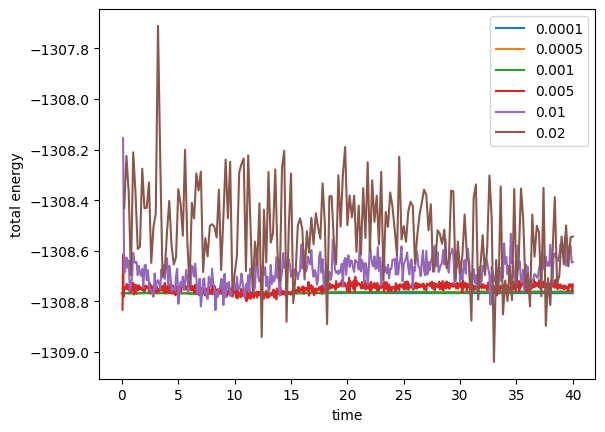

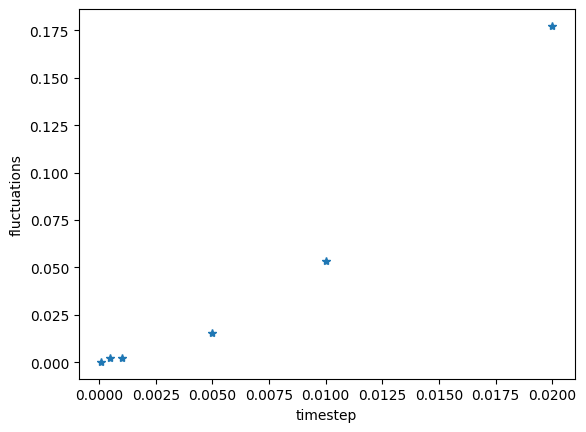

In [ ]:
# plotting solution 4.
times = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02]
fig, ax = plt.subplots()
for t in times:
  data = np.loadtxt(path+"/statistics_500_part_tstep"+str(t)+".txt")
  ax.plot(data.T[1], data.T[4], label=str(t))
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('total energy')
plt.show()

# plotting fluctuations of the energy
fig, ax = plt.subplots()
fluctuations = []
for t in times:
  data = np.loadtxt(path+"/statistics_500_part_tstep"+str(t)+".txt")
  nsteps, _ = data.shape
  fluctuations.append(np.std(data[int(nsteps/20):,4]))
ax.plot(times, fluctuations, '*')
ax.set_xlabel('timestep')
ax.set_ylabel('fluctuations')
plt.show()